In [2]:
import matplotlib.image as mpimg
from matplotlib.animation import FuncAnimation

from IPython import display
import pynbody
import pynbody.plot.sph as sph
import matplotlib.pylab as plt
from pathlib import Path
import numpy as np
from PIL import Image, ImageDraw

In [3]:
files = []
a = np.arange(0,452,1)
for value in a:
    entry = './Data/TheMice.tipsy.'+str(value).zfill(9)+'.ppm'
    files.append(Image.open(entry))
files[0].save('./Animations/TheMice.gif',
               save_all=True, append_images=files[1:], optimize=False, duration=90, loop=0)

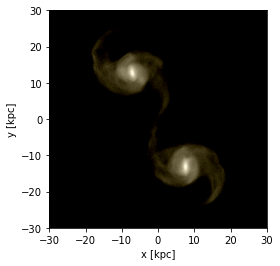

In [5]:
snapshot =pynbody.load('testing.tipsy.008765');

pynbody.plot.stars.render(snapshot.s,width='60 kpc', dynamic_range=2.2, plot = True, resolution=1000)


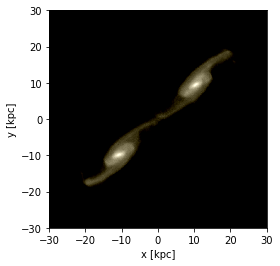

In [17]:
snapshot.rotate_x(78)
snapshot.rotate_y(-44)
snapshot.rotate_z(-130)
pynbody.plot.stars.render(snapshot.s,width='60 kpc', dynamic_range=2.2, plot = True, resolution=1000)

In [25]:
L = 39.5
V = 165

# Rotate from simulation coordinates to observation coordinates
# R=LMr+Rc,V=VMv+Vc.
# Nice

Omega1 = np.pi/2
w1 = -np.pi
i1 = -2*np.pi
MP = L * np.matrix([[np.cos(Omega1)*np.cos(w1)-np.sin(Omega1)*np.cos(i1)*np.sin(w1), -np.cos(Omega1)*np.sin(w1)-np.sin(Omega1)*np.cos(i1)*np.cos(w1), np.sin(Omega1)*np.sin(i1)],
       [np.sin(Omega1)*np.cos(w1)+np.cos(Omega1)*np.cos(i1)*np.sin(w1), -np.sin(Omega1)*np.sin(w1)+np.cos(Omega1)*np.cos(i1)*np.cos(w1), -np.cos(Omega1)*np.sin(i1)],
       [np.sin(i1)*np.sin(w1), np.sin(i1)*np.cos(w1), np.cos(i1)]]) 

MV = V * np.matrix([[np.cos(Omega1)*np.cos(w1)-np.sin(Omega1)*np.cos(i1)*np.sin(w1), -np.cos(Omega1)*np.sin(w1)-np.sin(Omega1)*np.cos(i1)*np.cos(w1), np.sin(Omega1)*np.sin(i1)],
       [np.sin(Omega1)*np.cos(w1)+np.cos(Omega1)*np.cos(i1)*np.sin(w1), -np.sin(Omega1)*np.sin(w1)+np.cos(Omega1)*np.cos(i1)*np.cos(w1), -np.cos(Omega1)*np.sin(i1)],
       [np.sin(i1)*np.sin(w1), np.sin(i1)*np.cos(w1), np.cos(i1)]]) 

def transformP(row):
    row = (MP * np.matrix(row).transpose())
    return(row)    

def transformV(row):
    row = (MV * np.matrix(row).transpose())
    return(row)  

snapshot =pynbody.load('testing.tipsy.008765');

lengths = {}
for fam in snapshot.families():
    lengths[fam.name] = len(snapshot[fam])

scaled_snapshot = pynbody.new(**lengths)

for fam in snapshot.families():
    snap_fam = snapshot[fam]  
    
    snap_fam['pos'] = np.apply_along_axis(transformP, 1, snap_fam['pos'])
    snap_fam['vel'] = np.apply_along_axis(transformV, 1, snap_fam['vel'])
    
    print("Scaling family " + str(fam))
    scaled_snapshot[fam][:len(snap_fam)]['pos'] = snap_fam['pos'].in_units('kpc')
    scaled_snapshot[fam][:len(snap_fam)]['vel'] = snap_fam['vel'].in_units('.9778 km s**-1')
    scaled_snapshot[fam][:len(snap_fam)]['mass'] = snap_fam['mass'].in_units('2.2222858e5 Msol')
    scaled_snapshot[fam][:len(snap_fam)]['rho'] = snap_fam['rho'].in_units('2.2222858e5 Msol kpc**-3')
    scaled_snapshot[fam][:len(snap_fam)]['eps'] = snap_fam['eps'].in_units('kpc')

scaled_snapshot.write(filename='scaled.tipsy', fmt=pynbody.tipsy.TipsySnap, cosmological = False)


Scaling family dm
Scaling family star


SimArray([[9.845614e-23, 9.845614e-23, 9.845614e-23, ..., 9.845614e-23,
           9.845614e-23, 9.845614e-23],
          [9.845614e-23, 9.845614e-23, 9.845614e-23, ..., 9.845614e-23,
           9.845614e-23, 9.845614e-23],
          [9.845614e-23, 9.845614e-23, 9.845614e-23, ..., 9.845614e-23,
           9.845614e-23, 9.845614e-23],
          ...,
          [9.845614e-23, 9.845614e-23, 9.845614e-23, ..., 9.845614e-23,
           9.845614e-23, 9.845614e-23],
          [9.845614e-23, 9.845614e-23, 9.845614e-23, ..., 9.845614e-23,
           9.845614e-23, 9.845614e-23],
          [9.845614e-23, 9.845614e-23, 9.845614e-23, ..., 9.845614e-23,
           9.845614e-23, 9.845614e-23]], dtype=float32, '2.22e+05 Msol kpc**-3')

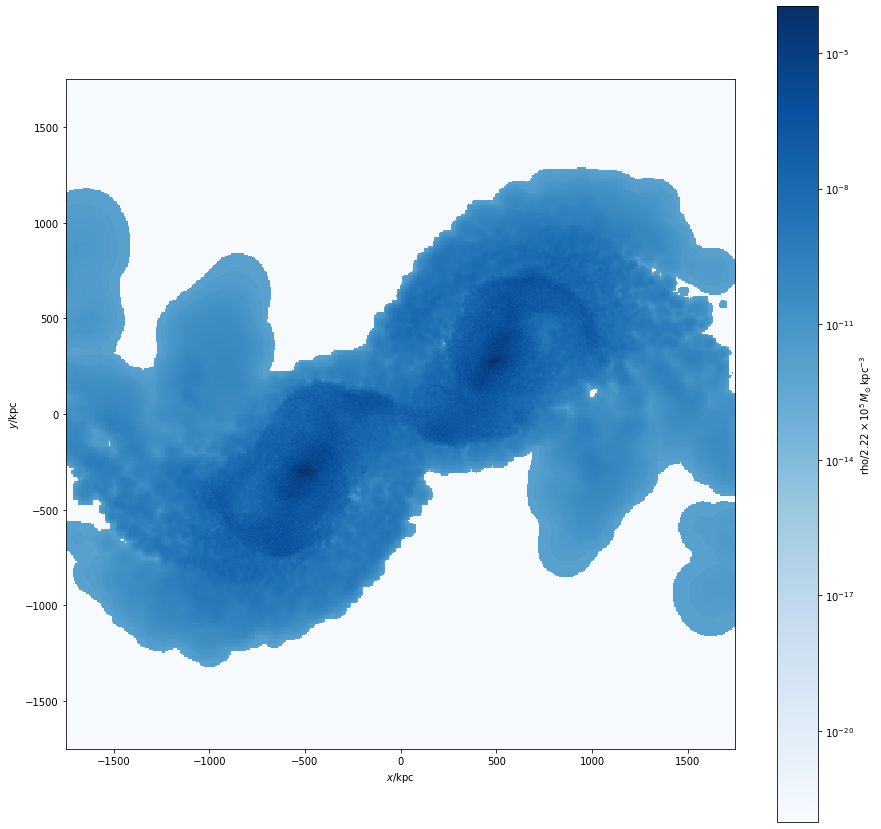

In [41]:
scaled =pynbody.load('scaled.tipsy');
fig = plt.figure(figsize=(15,15));
pynbody.plot.sph.image(scaled.s, qty='rho', width='3500 kpc', resolution=500, cmap='Blues')
#pynbody.plot.stars.render(scaled.s,width='2000 kpc', dynamic_range=2.2, plot = True, resolution=1000)


SimArray([[2.2257849e-09, 2.1915001e-09, 2.1572153e-09, ...,
           3.3334369e-09, 3.4831791e-09, 3.6329206e-09],
          [2.0825002e-09, 2.0489499e-09, 2.0153994e-09, ...,
           4.0224428e-09, 4.1584221e-09, 4.2943999e-09],
          [1.9392157e-09, 1.9063995e-09, 1.8735837e-09, ...,
           4.7114490e-09, 4.8336646e-09, 4.9558797e-09],
          ...,
          [7.2794863e-09, 7.3758404e-09, 7.4721935e-09, ...,
           1.8994160e-09, 1.9065052e-09, 1.9135946e-09],
          [6.7224457e-09, 6.7971371e-09, 6.8718284e-09, ...,
           1.8419720e-09, 1.8456190e-09, 1.8492662e-09],
          [6.1654042e-09, 6.2184333e-09, 6.2714629e-09, ...,
           1.7845280e-09, 1.7847328e-09, 1.7849375e-09]], dtype=float32, '2.22e+05 Msol kpc**-3')

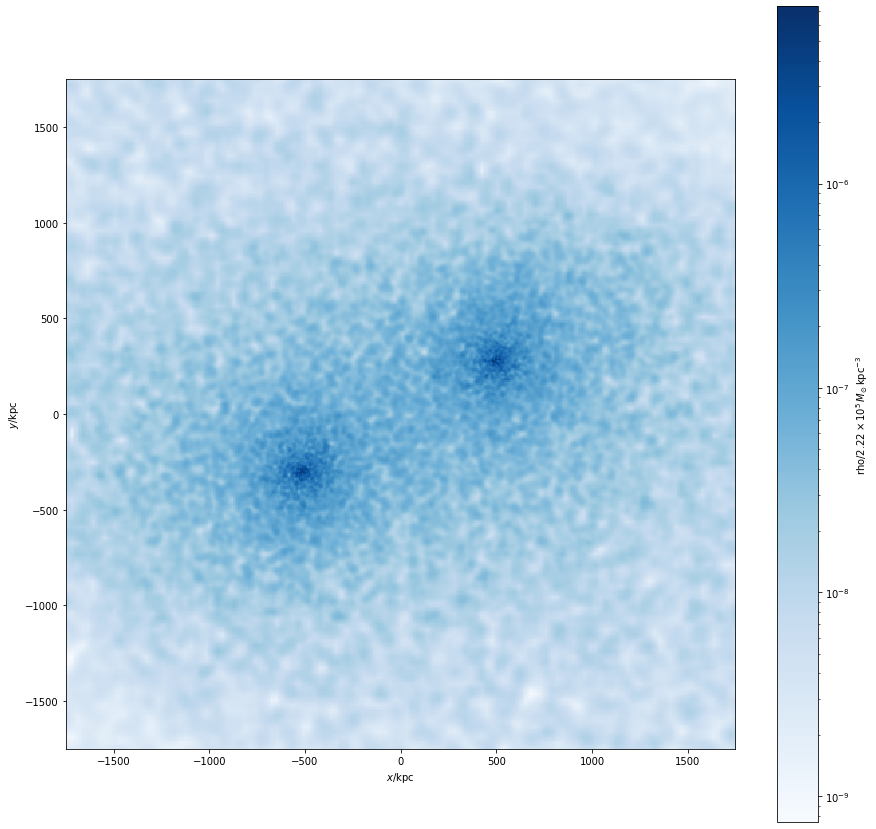

In [39]:
fig = plt.figure(figsize=(15,15));
pynbody.plot.sph.image(scaled.dm, qty='rho', width='3500 kpc', resolution=500, cmap='Blues')


In [ ]:
R=LMr+Rc,V=VMv+Vc.